In [15]:
import pandas as pd

# Define the path to the data folder
data_path = "data"

In [2]:

try:
    # Try reading the file while skipping initial rows if needed
    population_data = pd.read_csv(f"{data_path}/API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv", skiprows=4)
    population_data.head()
except pd.errors.ParserError as e:
    print("Parser error:", e)


In [3]:
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [4]:
# Read the country metadata file
country_metadata = pd.read_csv(f"{data_path}/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")
country_metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [5]:
# Read the indicator metadata file
indicator_metadata = pd.read_csv(f"{data_path}/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")
indicator_metadata.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


In [6]:
# Combine the three data frames into a single data frame
combined_data = pd.merge(population_data, country_metadata, on="Country Code")
combined_data = pd.merge(combined_data, indicator_metadata, on="Indicator Code")

# Print the first few rows of the combined data frame
print(combined_data.head())


KeyError: 'Indicator Code'

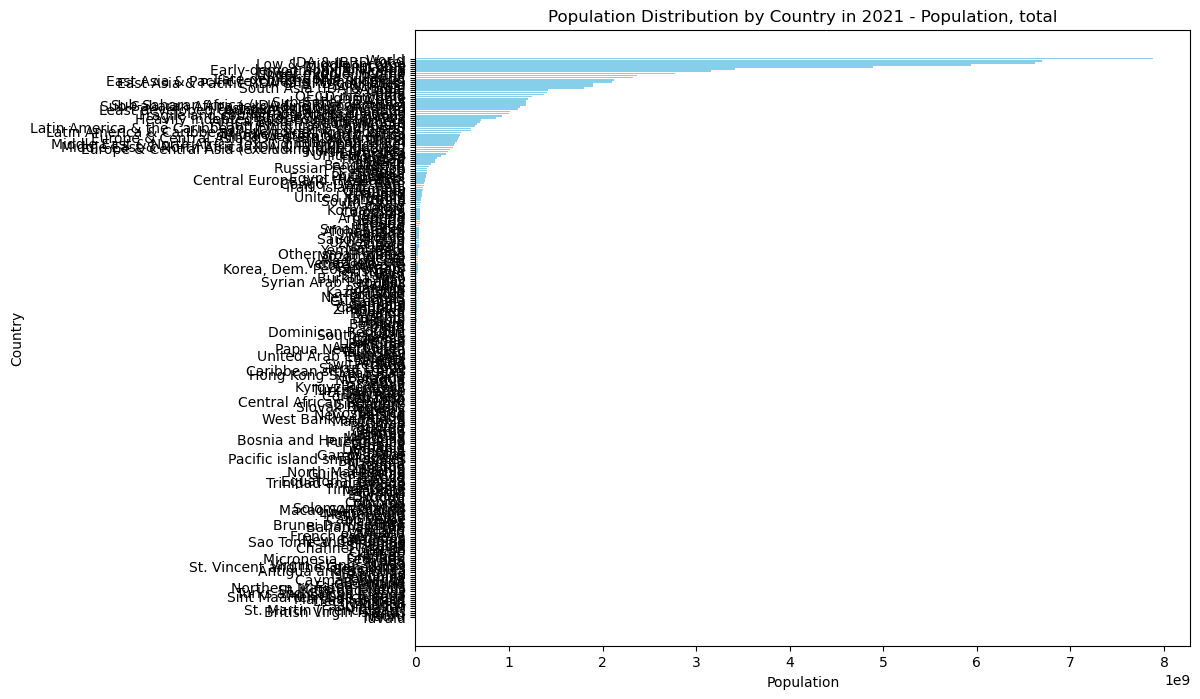

In [9]:
import matplotlib.pyplot as plt

# Read the population data
population_data = pd.read_csv(f"{data_path}/API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv", skiprows=4)

# Choose a specific year for visualization (e.g., 2021)
selected_year = '2021'

# Filter the data for the selected year
population_data_year = population_data[['Country Code', 'Country Name', selected_year]].copy()
population_data_year.rename(columns={selected_year: 'Population'}, inplace=True)
population_data_year.dropna(subset=['Population'], inplace=True)

# Read the additional country information
country_info = pd.read_csv(f"{data_path}/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")

# Merge population data with country information
merged_data = population_data_year.merge(country_info, on='Country Code')

# Sort the data by population in descending order
merged_data.sort_values(by='Population', ascending=False, inplace=True)

# Read the indicator information
indicator_info = pd.read_csv(f"{data_path}/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")

# Get indicator name based on the indicator code
indicator_code = 'SP.POP.TOTL'
indicator_name = indicator_info[indicator_info['INDICATOR_CODE'] == indicator_code]['INDICATOR_NAME'].values[0]

# Plot a bar chart
plt.figure(figsize=(10, 8))
plt.barh(merged_data['Country Name'], merged_data['Population'], color='skyblue')
plt.xlabel('Population')
plt.ylabel('Country')
plt.title(f'Population Distribution by Country in {selected_year} - {indicator_name}')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest population at the top
plt.show()


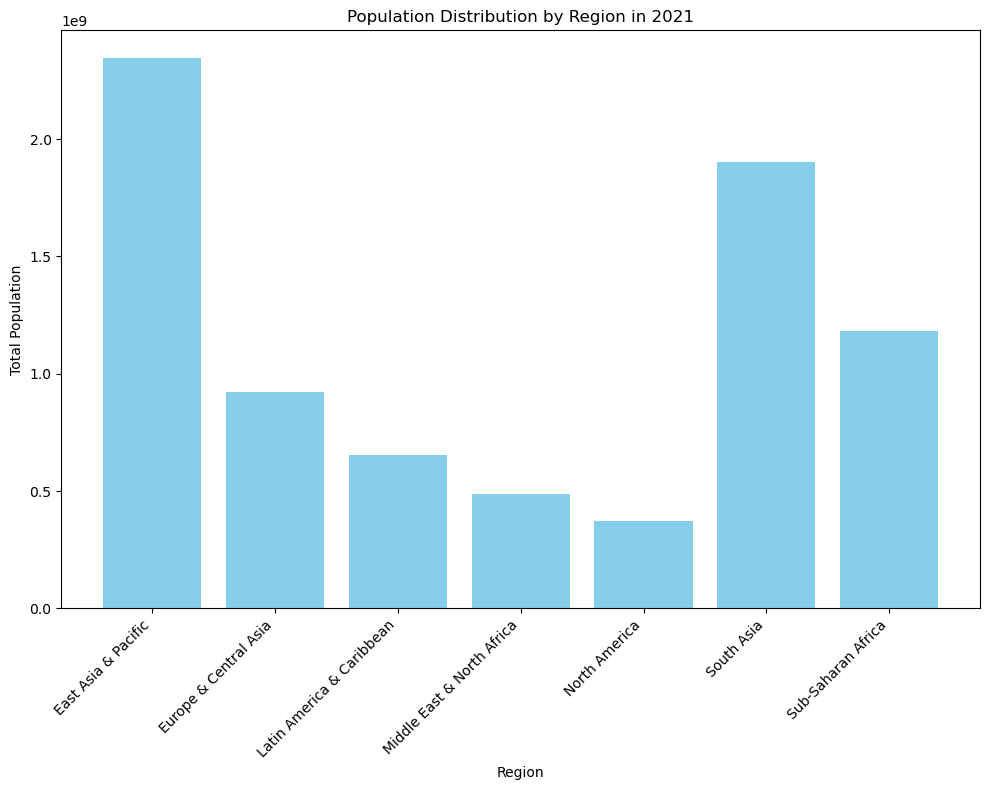

In [13]:

# Read the population data
population_data = pd.read_csv(f"{data_path}/API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv", skiprows=4)

# Choose a specific year for visualization (e.g., 2021)
selected_year = '2021'

# Filter the data for the selected year
population_data_year = population_data[['Country Code', 'Country Name', selected_year]].copy()
population_data_year.rename(columns={selected_year: 'Population'}, inplace=True)
population_data_year.dropna(subset=['Population'], inplace=True)

# Read the additional country information
country_info = pd.read_csv(f"{data_path}/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")

# Merge population data with country information
merged_data = population_data_year.merge(country_info, on='Country Code')

# Read the region information
region_info = merged_data[['Region', 'Population']].groupby('Region').sum()

# Plot a bar chart
plt.figure(figsize=(10, 8))
plt.bar(region_info.index, region_info['Population'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.title(f'Population Distribution by Region in {selected_year}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


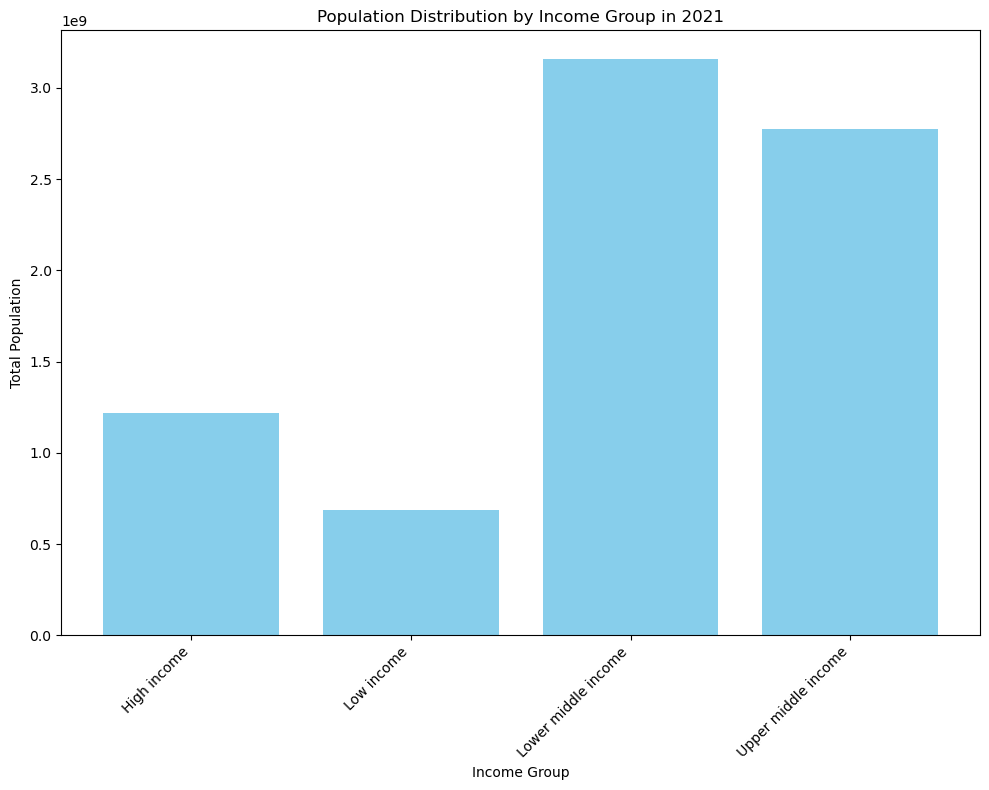

In [16]:

# Read the population data
population_data = pd.read_csv(f"{data_path}/API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv", skiprows=4)

# Choose a specific year for visualization (e.g., 2021)
selected_year = '2021'

# Filter the data for the selected year
population_data_year = population_data[['Country Code', 'Country Name', selected_year]].copy()
population_data_year.rename(columns={selected_year: 'Population'}, inplace=True)
population_data_year.dropna(subset=['Population'], inplace=True)

# Read the additional country information
country_info = pd.read_csv(f"{data_path}/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")

# Merge population data with country information
merged_data = population_data_year.merge(country_info, on='Country Code')

# Read the income group information
income_group_info = merged_data[['IncomeGroup', 'Population']].groupby('IncomeGroup').sum()

# Plot a bar chart
plt.figure(figsize=(10, 8))
plt.bar(income_group_info.index, income_group_info['Population'], color='skyblue')
plt.xlabel('Income Group')
plt.ylabel('Total Population')
plt.title(f'Population Distribution by Income Group in {selected_year}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


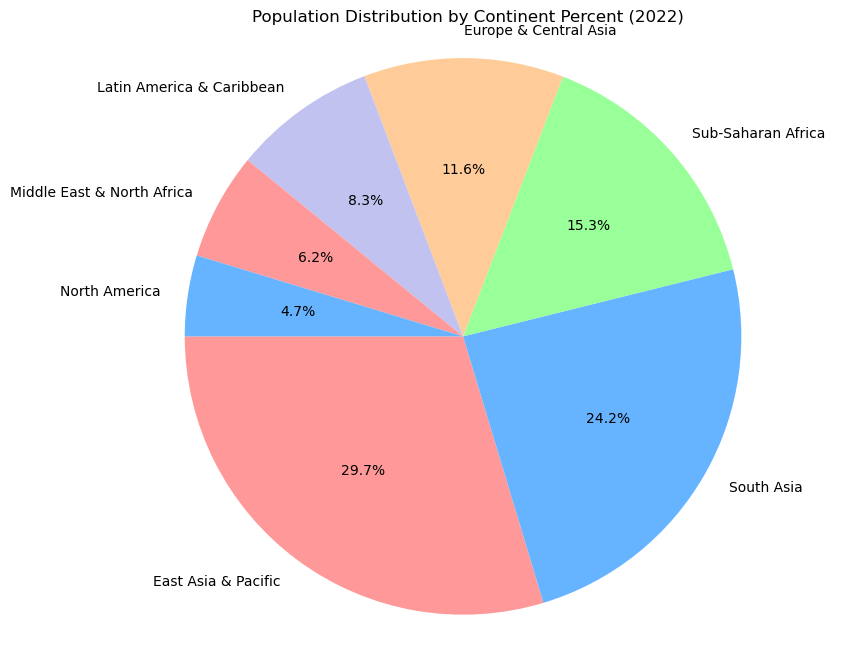

In [17]:

# Read the population data
population_data = pd.read_csv(f"{data_path}/API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv", skiprows=4)

# Choose the year 2022 for visualization
selected_year = '2022'

# Filter the data for the selected year
population_data_year = population_data[['Country Code', 'Country Name', selected_year]].copy()
population_data_year.rename(columns={selected_year: 'Population'}, inplace=True)
population_data_year.dropna(subset=['Population'], inplace=True)

# Read the additional country information
country_info = pd.read_csv(f"{data_path}/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")

# Merge population data with country information
merged_data = population_data_year.merge(country_info, on='Country Code')

# Group the data by continent and calculate the sum of population for 2022
grouped_df = merged_data.groupby('Region').sum(numeric_only=True).sort_values(by="Population", ascending=False)

# Define colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Extract labels and sizes for the pie chart
labels = grouped_df.index.tolist()
sizes = grouped_df["Population"].tolist()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=colors)
plt.axis('equal')
plt.title("Population Distribution by Continent Percent (2022)")
plt.show()


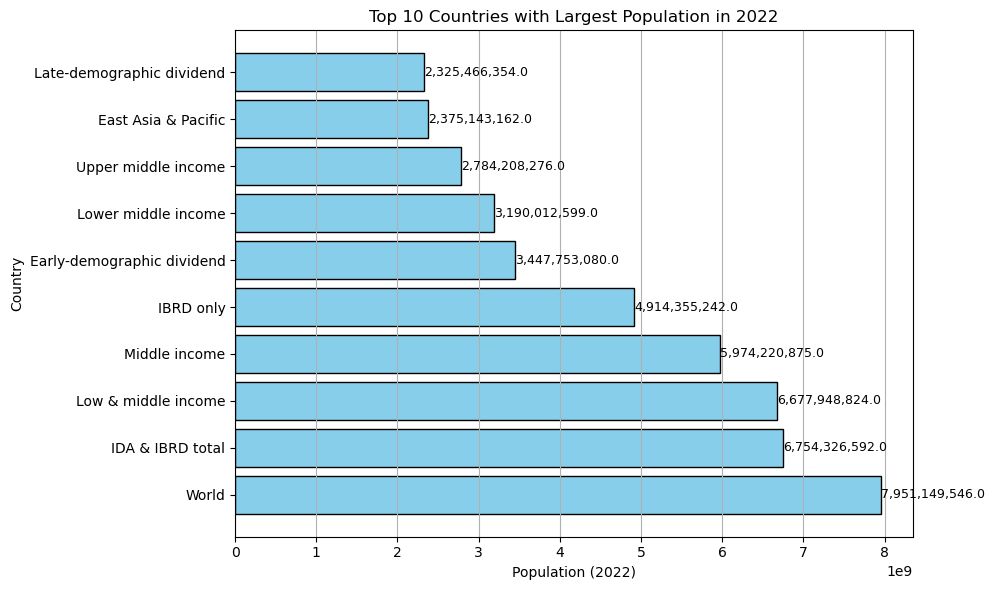

In [18]:

# Read the population data
population_data = pd.read_csv(f"{data_path}/API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv", skiprows=4)

# Choose the year 2022 for visualization
selected_year = '2022'

# Filter the data for the selected year
population_data_year = population_data[['Country Code', 'Country Name', selected_year]].copy()
population_data_year.rename(columns={selected_year: 'Population'}, inplace=True)
population_data_year.dropna(subset=['Population'], inplace=True)

# Read the additional country information
country_info = pd.read_csv(f"{data_path}/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5695140.csv")

# Merge population data with country information
merged_data = population_data_year.merge(country_info, on='Country Code')

# Select the top 10 countries with the largest population
top_10_population = merged_data.nlargest(10, 'Population')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_population['Country Name'], top_10_population['Population'], color='skyblue', edgecolor='black')

plt.xlabel('Population (2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Largest Population in 2022')
plt.grid(axis='x')

# Adding data labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000000, bar.get_y() + bar.get_height() / 2, f'{width:,}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

# Specify the correct file path
fertility_path = "fertility_rate"

# Read the data from the CSV file
fertility_data = pd.read_csv(f"{fertility_path}/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv", skiprows=4)

# Display the first few rows of the data
fertility_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,NaN,NaN


In [26]:

# Specify the correct file path for fertility data and metadata
fertility_path = "fertility_rate"

# Read the metadata from the CSV file
metadata_country = pd.read_csv(f"{fertility_path}/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv")

# Display the metadata
metadata_country


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [27]:
import pandas as pd

# Specify the correct file path for fertility data and metadata
fertility_path = "fertility_rate"

# Read the metadata from the CSV file
metadata_indicator = pd.read_csv(f"{fertility_path}/Metadata_Indicator_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv")

# Display the metadata
metadata_indicator


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.DYN.TFRT.IN,"Fertility rate, total (births per woman)",Total fertility rate represents the number of ...,(1) United Nations Population Division. World ...,NaN


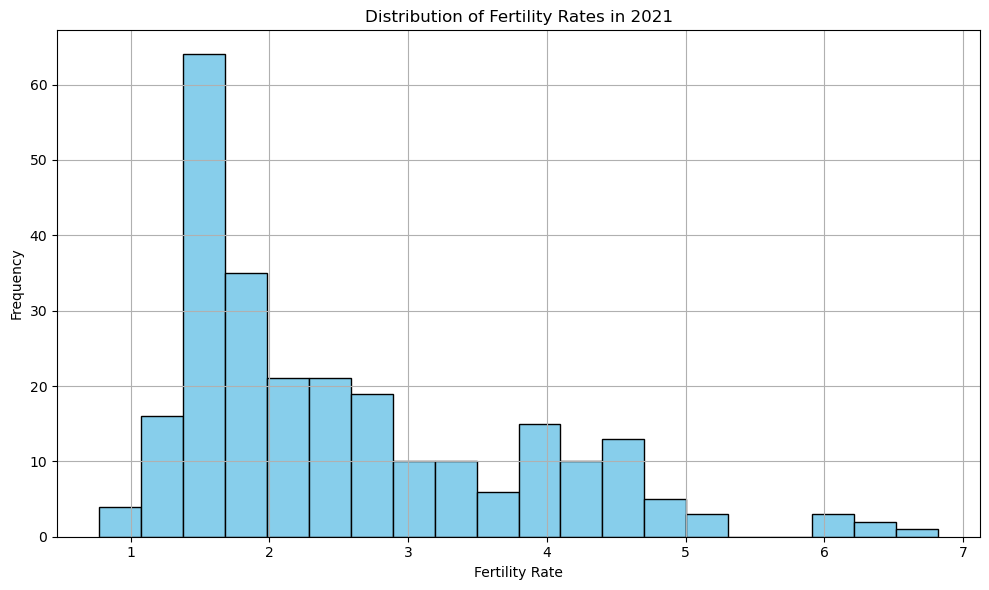

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the fertility rate data
fertility_data = pd.read_csv("fertility_rate/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv", skiprows=4)

# Choose a specific year for visualization (e.g., 2021)
selected_year = '2021'

# Filter the data for the selected year
fertility_data_year = fertility_data[['Country Code', 'Country Name', selected_year]].copy()
fertility_data_year.rename(columns={selected_year: 'Fertility Rate'}, inplace=True)
fertility_data_year.dropna(subset=['Fertility Rate'], inplace=True)

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(fertility_data_year['Fertility Rate'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Fertility Rates in 2021')
plt.grid()

plt.tight_layout()
plt.show()


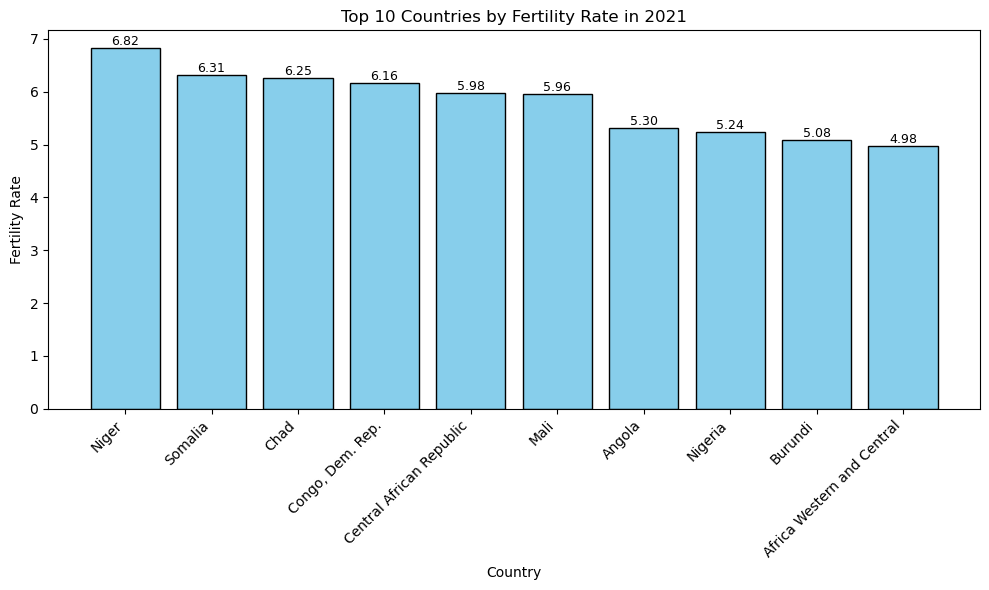

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the fertility rate data
fertility_data = pd.read_csv("fertility_rate/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv", skiprows=4)

# Choose a specific year for visualization (e.g., 2021)
selected_year = '2021'

# Filter the data for the selected year
fertility_data_year = fertility_data[['Country Code', 'Country Name', selected_year]].copy()
fertility_data_year.rename(columns={selected_year: 'Fertility Rate'}, inplace=True)
fertility_data_year.dropna(subset=['Fertility Rate'], inplace=True)

# Select the top countries based on fertility rates
top_countries = fertility_data_year.nlargest(10, 'Fertility Rate')

# Plot a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries['Country Name'], top_countries['Fertility Rate'], color='skyblue', edgecolor='black')

plt.xlabel('Country')
plt.ylabel('Fertility Rate')
plt.title(f'Top 10 Countries by Fertility Rate in {selected_year}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding data labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()


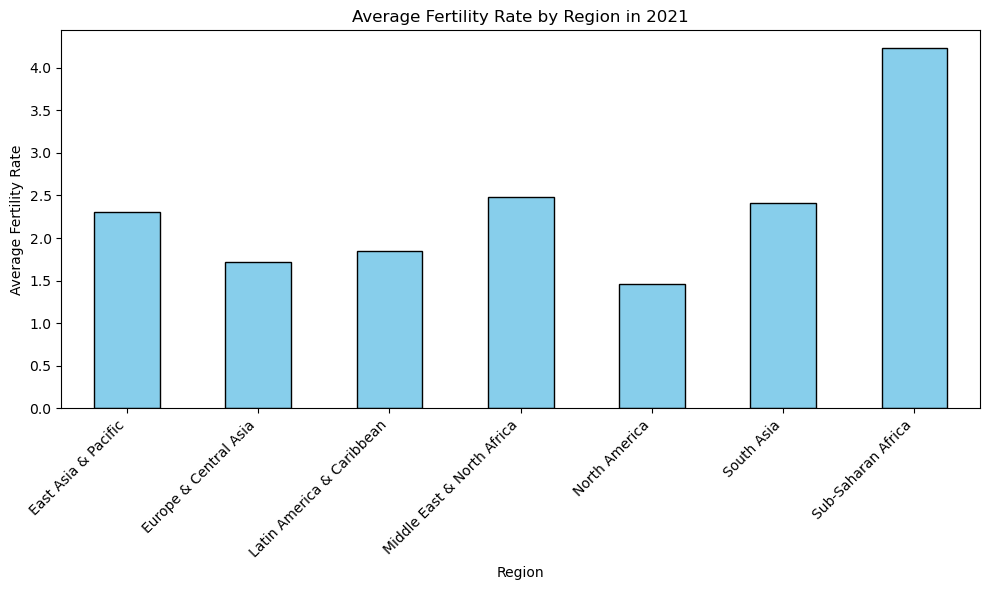

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the fertility rate data
fertility_data = pd.read_csv("fertility_rate/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv", skiprows=4)

# Read the metadata file with region information
metadata_file = "fertility_rate/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv"
metadata = pd.read_csv(metadata_file)

# Choose a specific year for visualization (e.g., 2021)
selected_year = '2021'

# Filter the fertility data for the selected year
fertility_data_year = fertility_data[['Country Code', 'Country Name', selected_year]].copy()
fertility_data_year.rename(columns={selected_year: 'Fertility Rate'}, inplace=True)
fertility_data_year.dropna(subset=['Fertility Rate'], inplace=True)

# Merge fertility data with region information from metadata
merged_data = fertility_data_year.merge(metadata[['Country Code', 'Region']], on='Country Code')

# Calculate the average fertility rate for each region
avg_fertility_by_region = merged_data.groupby('Region')['Fertility Rate'].mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
avg_fertility_by_region.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Region')
plt.ylabel('Average Fertility Rate')
plt.title(f'Average Fertility Rate by Region in {selected_year}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


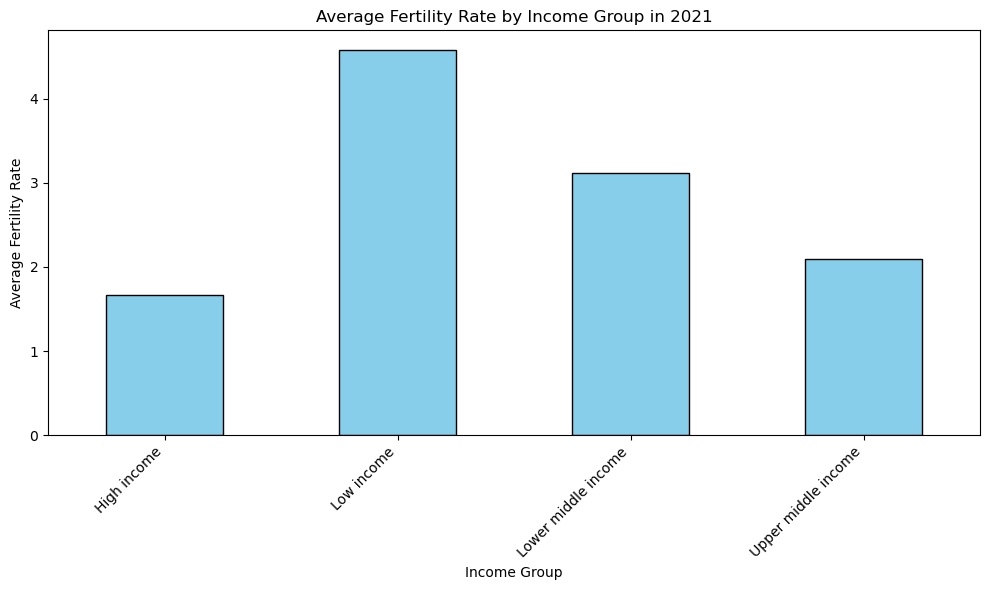

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the fertility rate data
fertility_data = pd.read_csv("fertility_rate/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv", skiprows=4)

# Read the income group data
income_group_data = pd.read_csv("fertility_rate/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_5729644.csv")

# Choose a specific year for visualization (e.g., 2021)
selected_year = '2021'

# Filter the fertility data for the selected year
fertility_data_year = fertility_data[['Country Code', 'Country Name', selected_year]].copy()
fertility_data_year.rename(columns={selected_year: 'Fertility Rate'}, inplace=True)
fertility_data_year.dropna(subset=['Fertility Rate'], inplace=True)

# Merge fertility data with income group data
merged_data = fertility_data_year.merge(income_group_data[['Country Code', 'IncomeGroup']], on='Country Code')

# Calculate the average fertility rate for each income group
avg_fertility_by_income_group = merged_data.groupby('IncomeGroup')['Fertility Rate'].mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
avg_fertility_by_income_group.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Income Group')
plt.ylabel('Average Fertility Rate')
plt.title(f'Average Fertility Rate by Income Group in {selected_year}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
